In [1]:
# %matplotlib widget

import os
import numpy as np
import pandas as pd
import itertools as it
from glob import glob
import matplotlib.pyplot as plt
from sbpy.calib import Sun
from astropy import units as u
from astropy.io import fits

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from astropy.visualization import ImageNormalize, PercentileInterval, AsinhStretch

from lvmdrp.core.constants import LVM_UNAM_URL
from lvmdrp.utils.examples import fetch_example_data, get_frames_metadata, get_masters_metadata

from lvmdrp.core import rss, image, spectrum1d
from lvmdrp.functions import imageMethod, rssMethod, fluxCalMethod

plt.style.use("seaborn-v0_8-talk")

In [2]:
# define input data directory
data_path = os.path.abspath(os.path.join("..", "data"))

# let's create the output directory
output_path = "./data"
os.makedirs(output_path, exist_ok=True)

# create processed frames path template
out_main_path = os.path.join(output_path, "lvm-{kind}-{camera}-{expnum}.{ext}")
out_calib_path = os.path.join(output_path, "lvm-{mjd}-{kind}-{camera}-{exptime}.{ext}")

# overwrite or not
OVERWRITE = False

In [3]:
# extract metadata
frames_table = get_frames_metadata(path=os.path.join(data_path, "lco_com"), ignore_cache=False).to_pandas()
frames_table = frames_table.loc[~frames_table.mjd.isin([60008,60009,60037,60038])]

# get master calibration metadata
masters_table = get_masters_metadata(path_pattern=out_calib_path)

[INFO]: loading cached metadata from '/home/mejia/Research/UNAM/lvm-drp/lvmdrp/examples/data/lco_com/frames_table.pkl'


       mjd  kind camera exptime                             path
40   super  xarc     b1       x  ./data/lvm-super-xarc-b1-x.fits
222  super  xarc     b2       x  ./data/lvm-super-xarc-b2-x.fits
332  super  xarc     b3       x  ./data/lvm-super-xarc-b3-x.fits
467  super  xarc     r1       x  ./data/lvm-super-xarc-r1-x.fits
83   super  xarc     r2       x  ./data/lvm-super-xarc-r2-x.fits
33   super  xarc     r3       x  ./data/lvm-super-xarc-r3-x.fits
344  super  xarc     z1       x  ./data/lvm-super-xarc-z1-x.fits
325  super  xarc     z2       x  ./data/lvm-super-xarc-z2-x.fits
391  super  xarc     z3       x  ./data/lvm-super-xarc-z3-x.fits
mjd                                  super
kind                                  xarc
camera                                  b1
exptime                                  x
path       ./data/lvm-super-xarc-b1-x.fits
Name: 40, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 

measuring arc lines upwards from ref_fiber = 319:  66%|##############################5               | 212/319 [00:02<00:01, 54.19fiber/s]

[WARNING]: Number of calls to function has reached maxfev = 9999. (RuntimeWarning)


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:05<00:00, 53.44fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:11<00:00, 28.06fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.068442 AA (0.115596 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0505206 AA (0.0854962 pix)
[WARNING]: overflow encountered in power (RuntimeWarning)


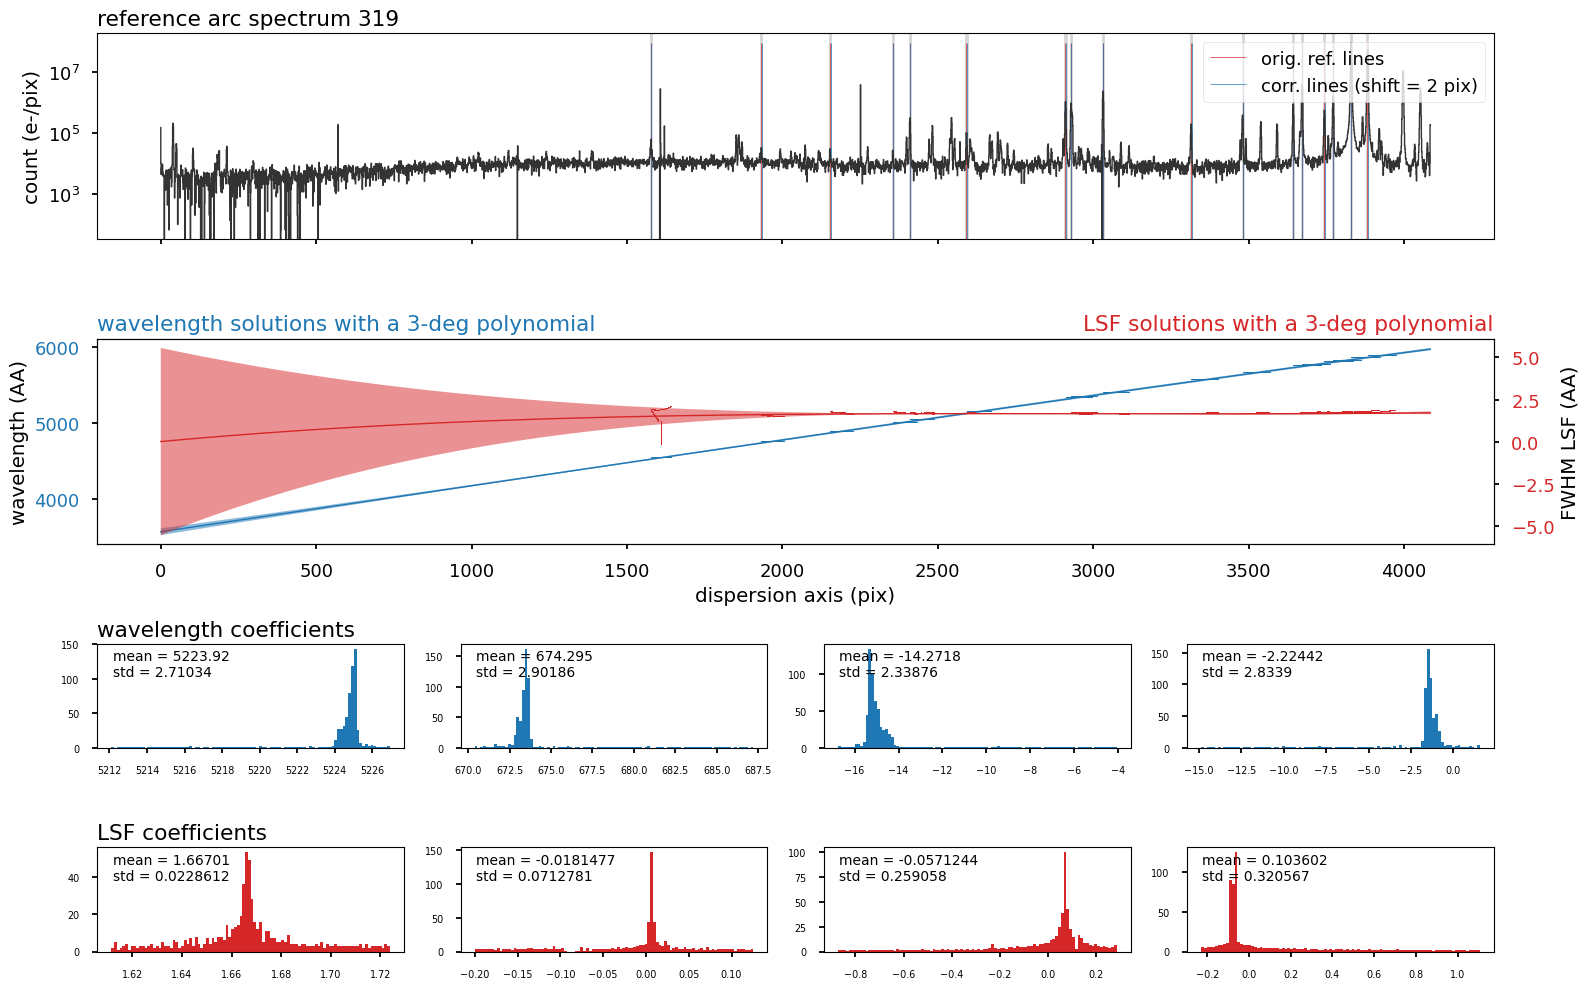

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b1-x.fits' and './data/lvm-super-lsf-b1-x.fits'
mjd                                  super
kind                                  xarc
camera                                  b2
exptime                                  x
path       ./data/lvm-super-xarc-b2-x.fits
Name: 222, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  10.5263 %
[INFO]: going to use 17 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b2-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 39 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:48<00:00,  6.51fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:37<00:00,  8.55fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 1.94942 AA (3.30474 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0884306 AA (0.147 pix)


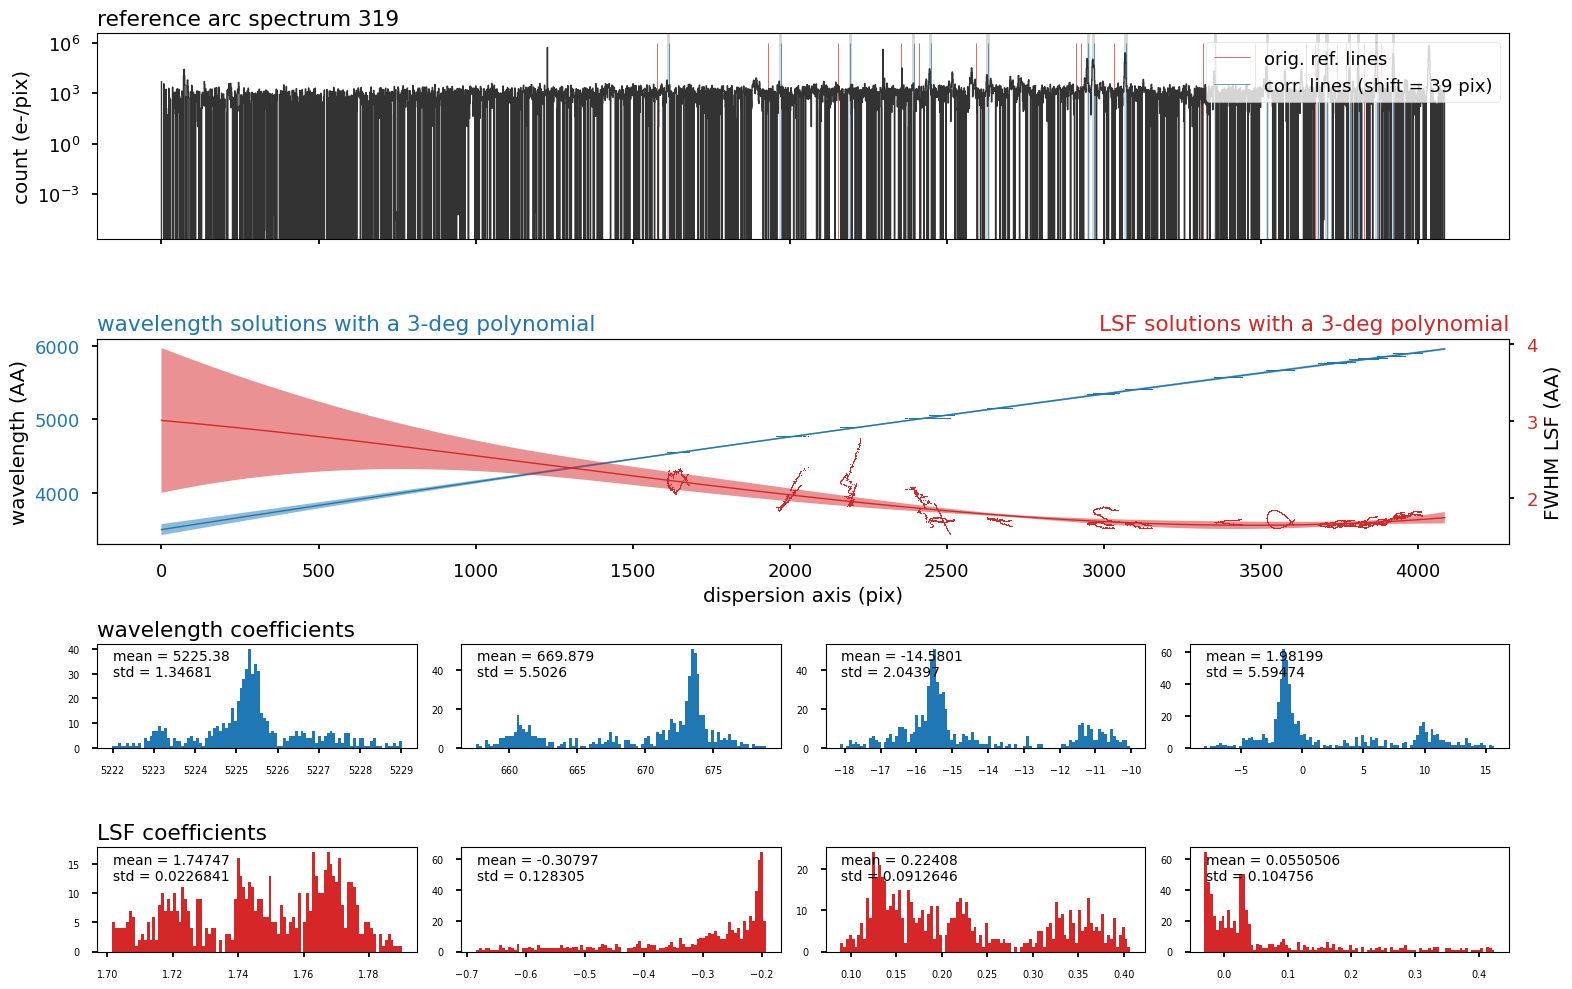

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b2-x.fits' and './data/lvm-super-lsf-b2-x.fits'
mjd                                  super
kind                                  xarc
camera                                  b3
exptime                                  x
path       ./data/lvm-super-xarc-b3-x.fits
Name: 332, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_b1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 19 percentage masked  10.5263 %
[INFO]: going to use 17 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-b3-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 37 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:08<00:00, 38.56fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:08<00:00, 39.71fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.063115 AA (0.106556 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0537446 AA (0.0895367 pix)


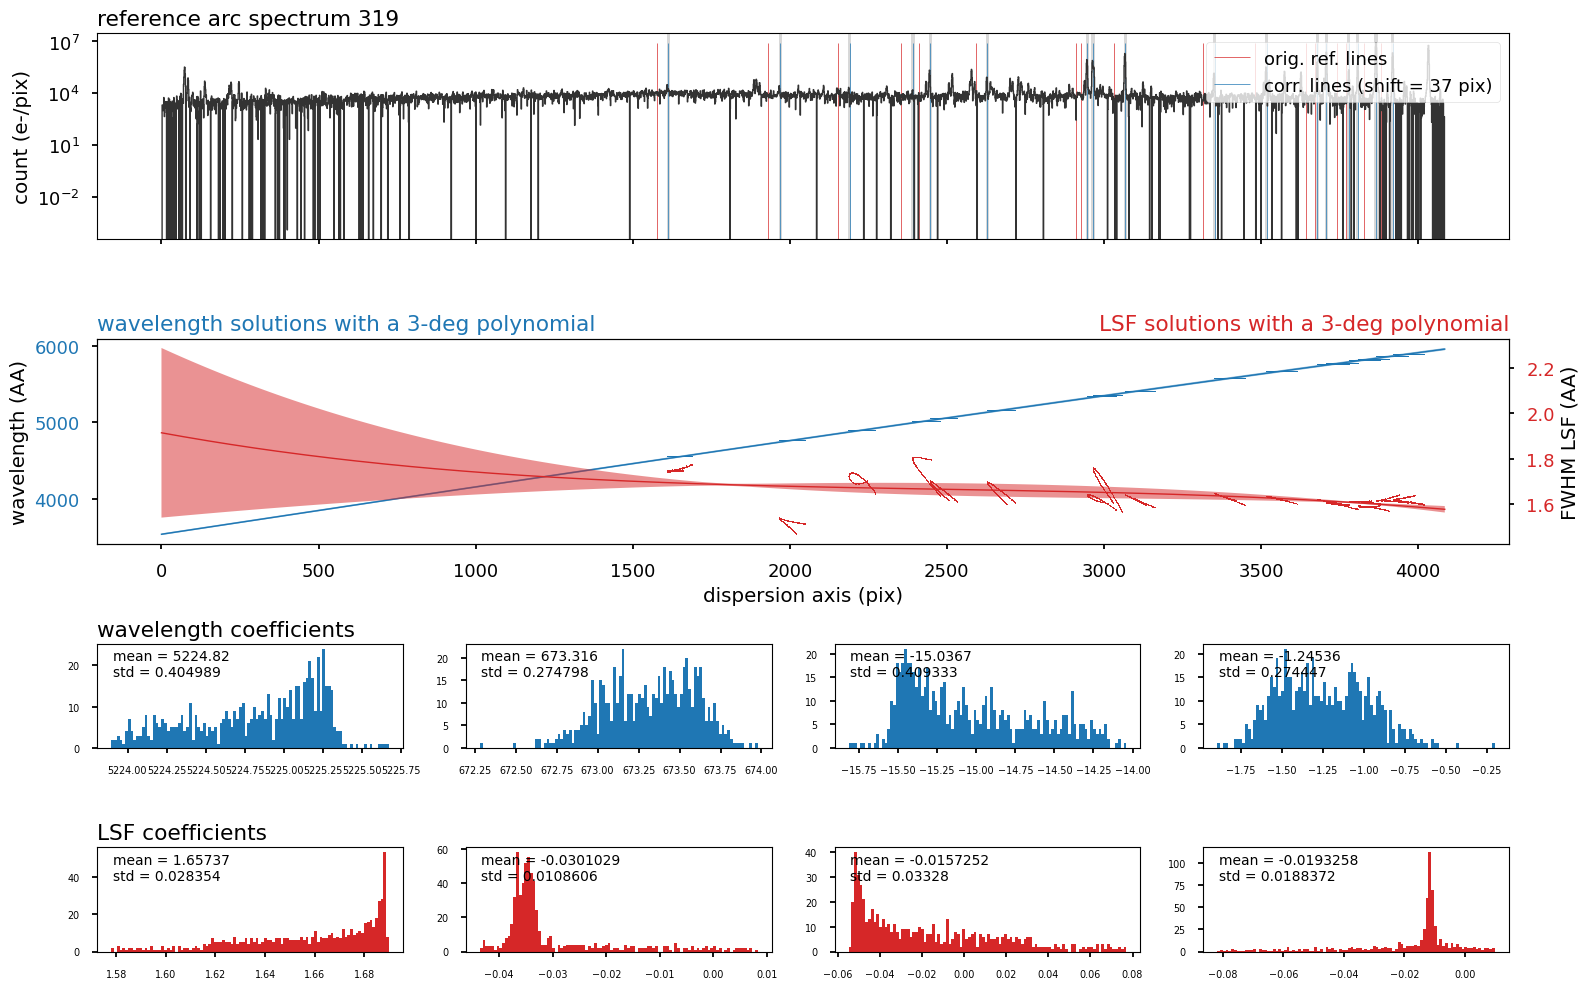

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-b3-x.fits' and './data/lvm-super-lsf-b3-x.fits'
mjd                                  super
kind                                  xarc
camera                                  r1
exptime                                  x
path       ./data/lvm-super-xarc-r1-x.fits
Name: 467, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 27 percentage masked  7.40741 %
[INFO]: going to use 25 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r1-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [02:12<00:00,  2.42fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:58<00:00,  5.47fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[WARNING]: fiber 0 has all lines masked
[WARNING]: fiber 1 has all lines masked
[WARNING]: fiber 2 has all lines masked
[WARNING]: fiber 3 has all lines masked
[WARNING]: fiber 4 has all lines masked
[WARNING]: fiber 5 has all lines masked
[WARNING]: fiber 6 has all lines masked
[WARNING]: fiber 7 has all lines masked
[WARNING]: fiber 8 has all lines masked
[WARNING]: fiber 9 has all lines masked
[WARNING]: fiber 10 has all lines masked
[WARNING]: fiber 11 has all lines masked
[WARNING]: fiber 12 has all lines masked
[WARNING]: fiber 13 has all lines masked
[WARNING]: fiber 14 has all lines masked
[WARNING]: fiber 15 has all lines masked
[WARNING]: fiber 16 has all lines masked
[WARNING]: fiber 17 has all lines masked
[WARNING]: fiber 18 has all lines masked
[WARNING]: fiber 19 has all lines masked
[WARNING]: fiber 20 has all lines maske

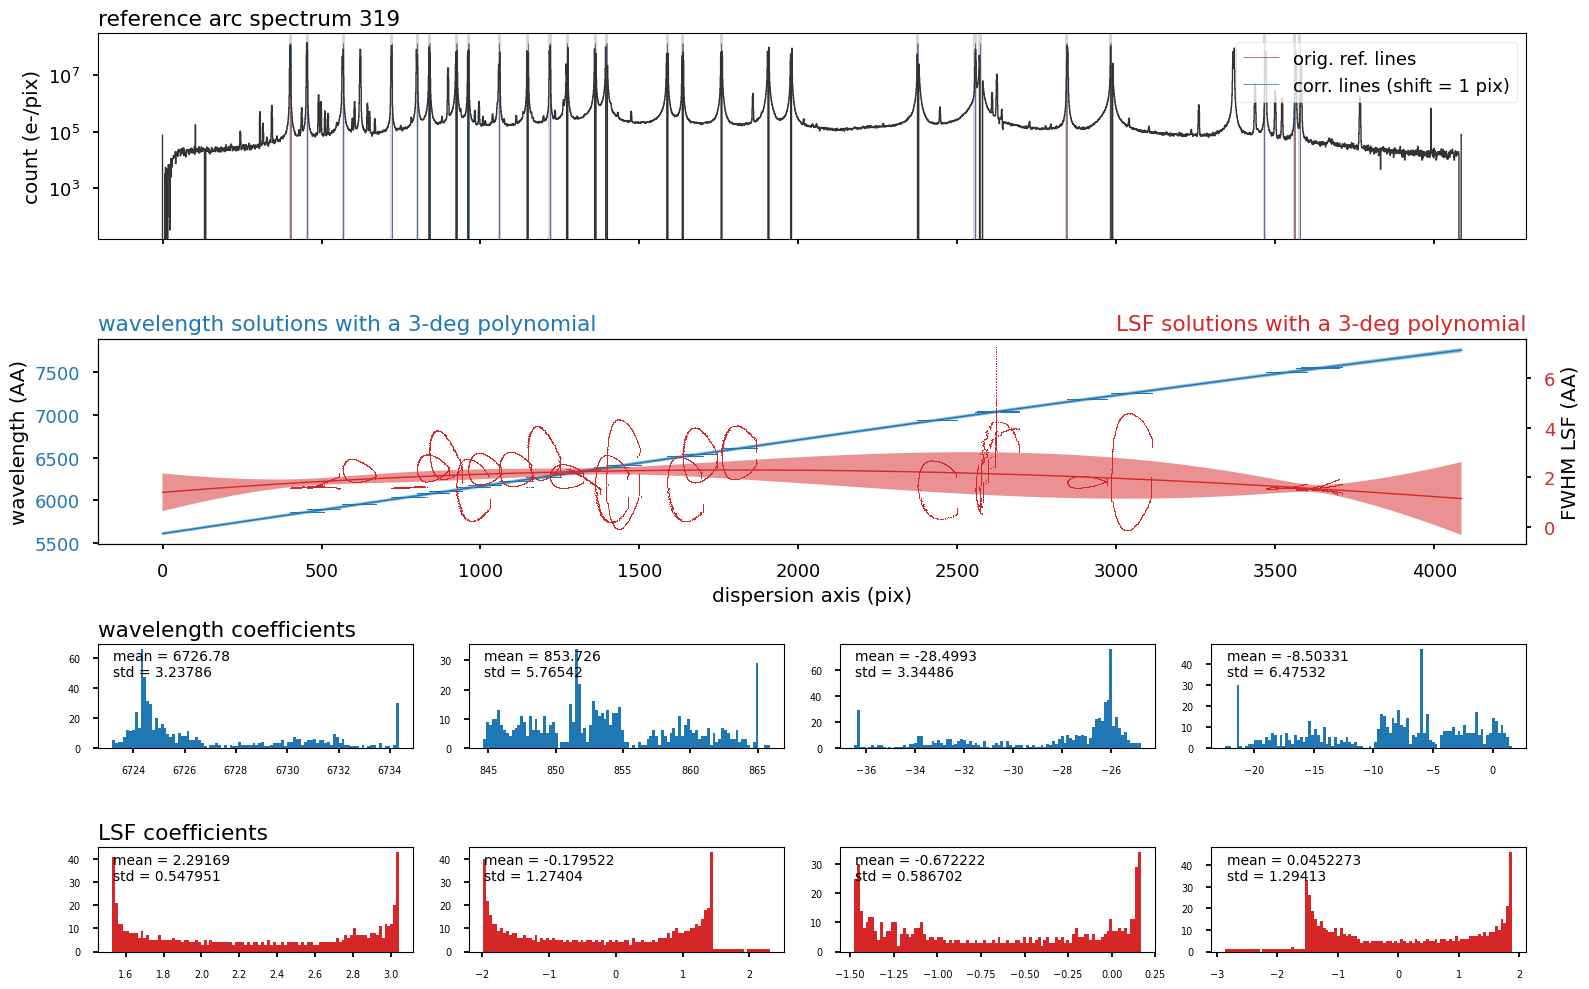

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r1-x.fits' and './data/lvm-super-lsf-r1-x.fits'
mjd                                  super
kind                                  xarc
camera                                  r2
exptime                                  x
path       ./data/lvm-super-xarc-r2-x.fits
Name: 83, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 27 percentage masked  7.40741 %
[INFO]: going to use 25 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r2-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 6 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:08<00:00, 39.12fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:16<00:00, 18.71fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.272487 AA (0.516475 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.217251 AA (0.426676 pix)


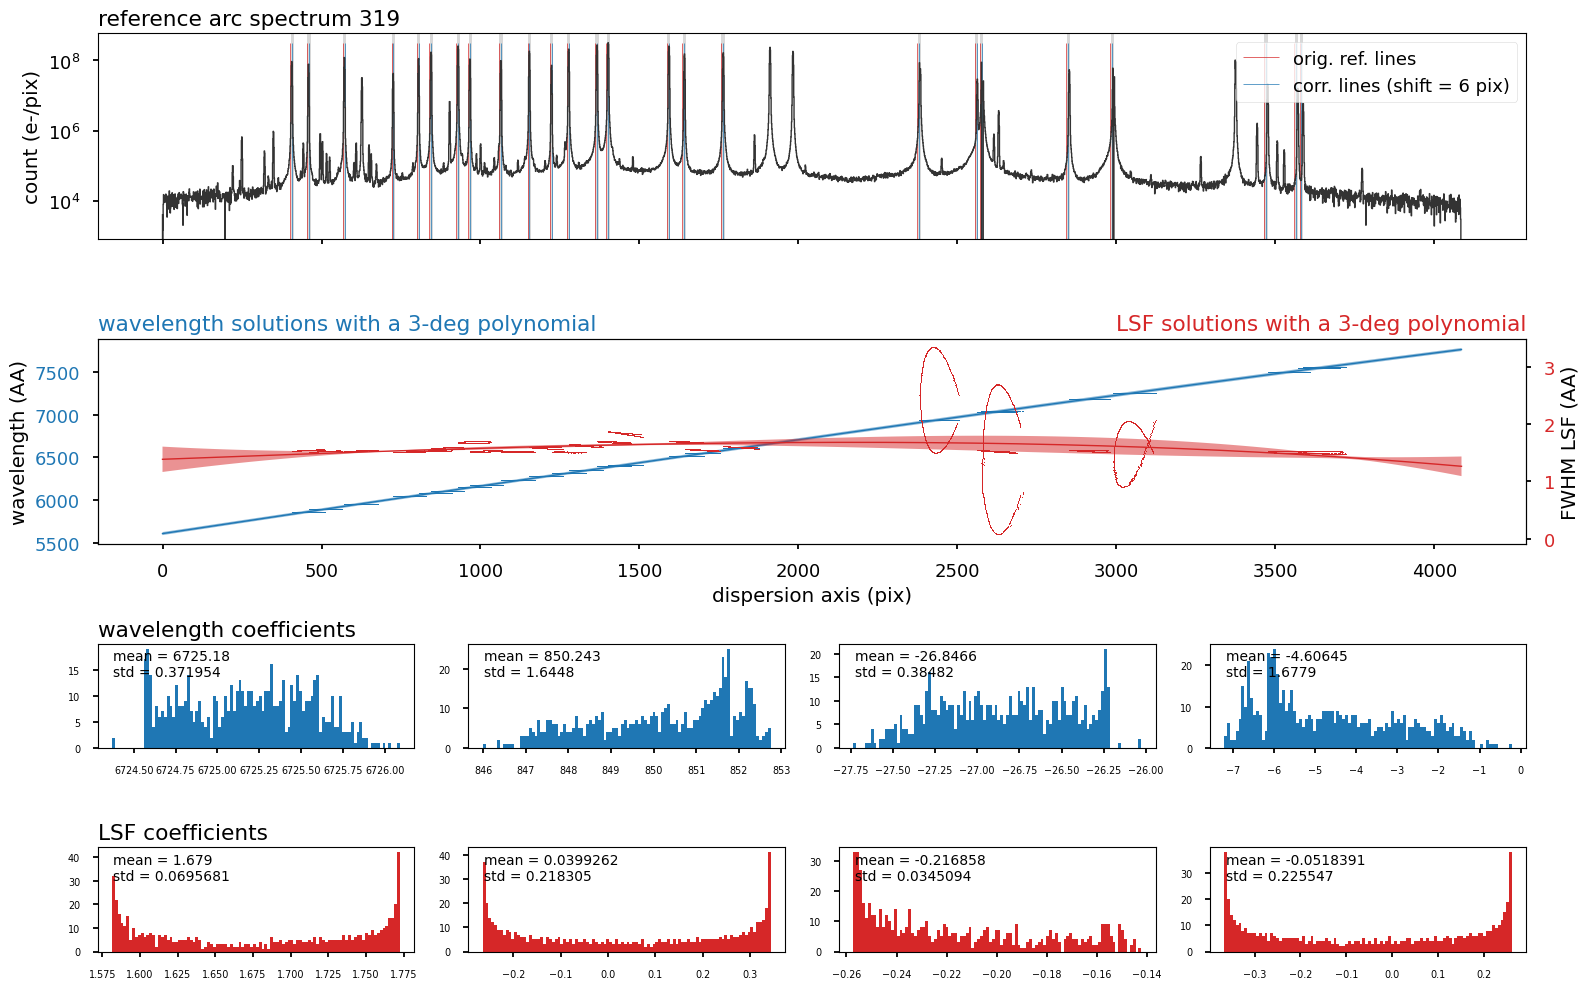

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r2-x.fits' and './data/lvm-super-lsf-r2-x.fits'
mjd                                  super
kind                                  xarc
camera                                  r3
exptime                                  x
path       ./data/lvm-super-xarc-r3-x.fits
Name: 33, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_r1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 27 percentage masked  7.40741 %
[INFO]: going to use 25 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-r3-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -6 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:08<00:00, 35.93fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:16<00:00, 19.70fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.109085 AA (0.223834 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.242115 AA (0.476683 pix)


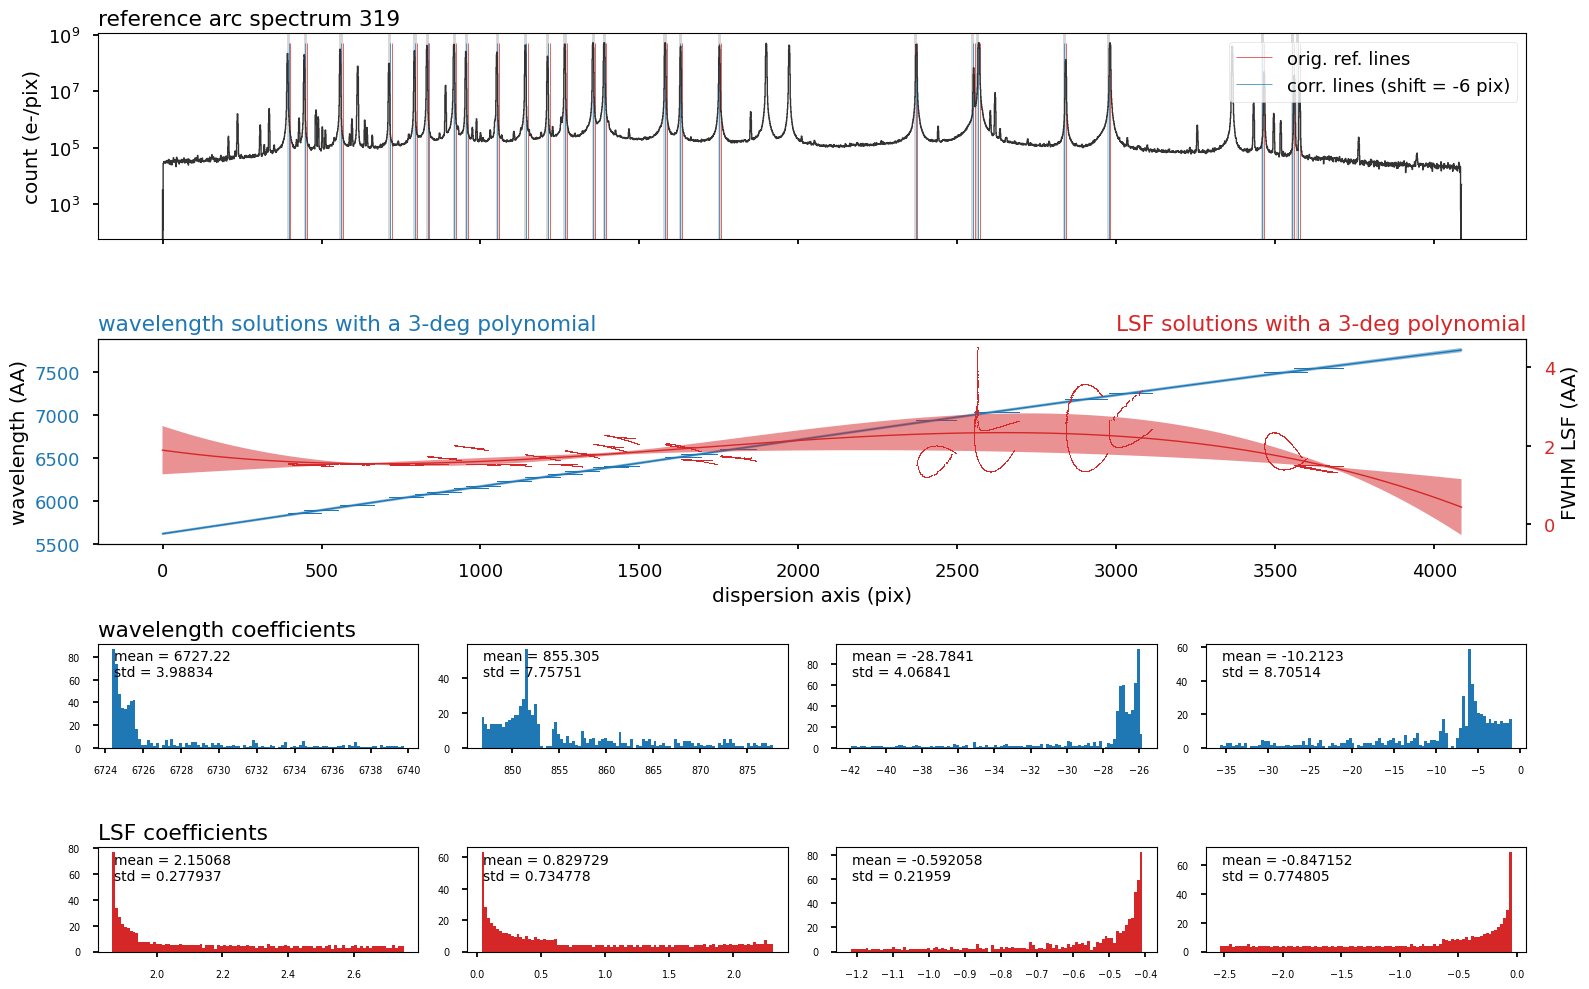

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-r3-x.fits' and './data/lvm-super-lsf-r3-x.fits'
mjd                                  super
kind                                  xarc
camera                                  z1
exptime                                  x
path       ./data/lvm-super-xarc-z1-x.fits
Name: 344, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 26 percentage masked  19.2308 %
[INFO]: going to use 21 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z1-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 1 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:06<00:00, 52.49fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:05<00:00, 55.74fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.121522 AA (0.204739 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.159882 AA (0.262414 pix)


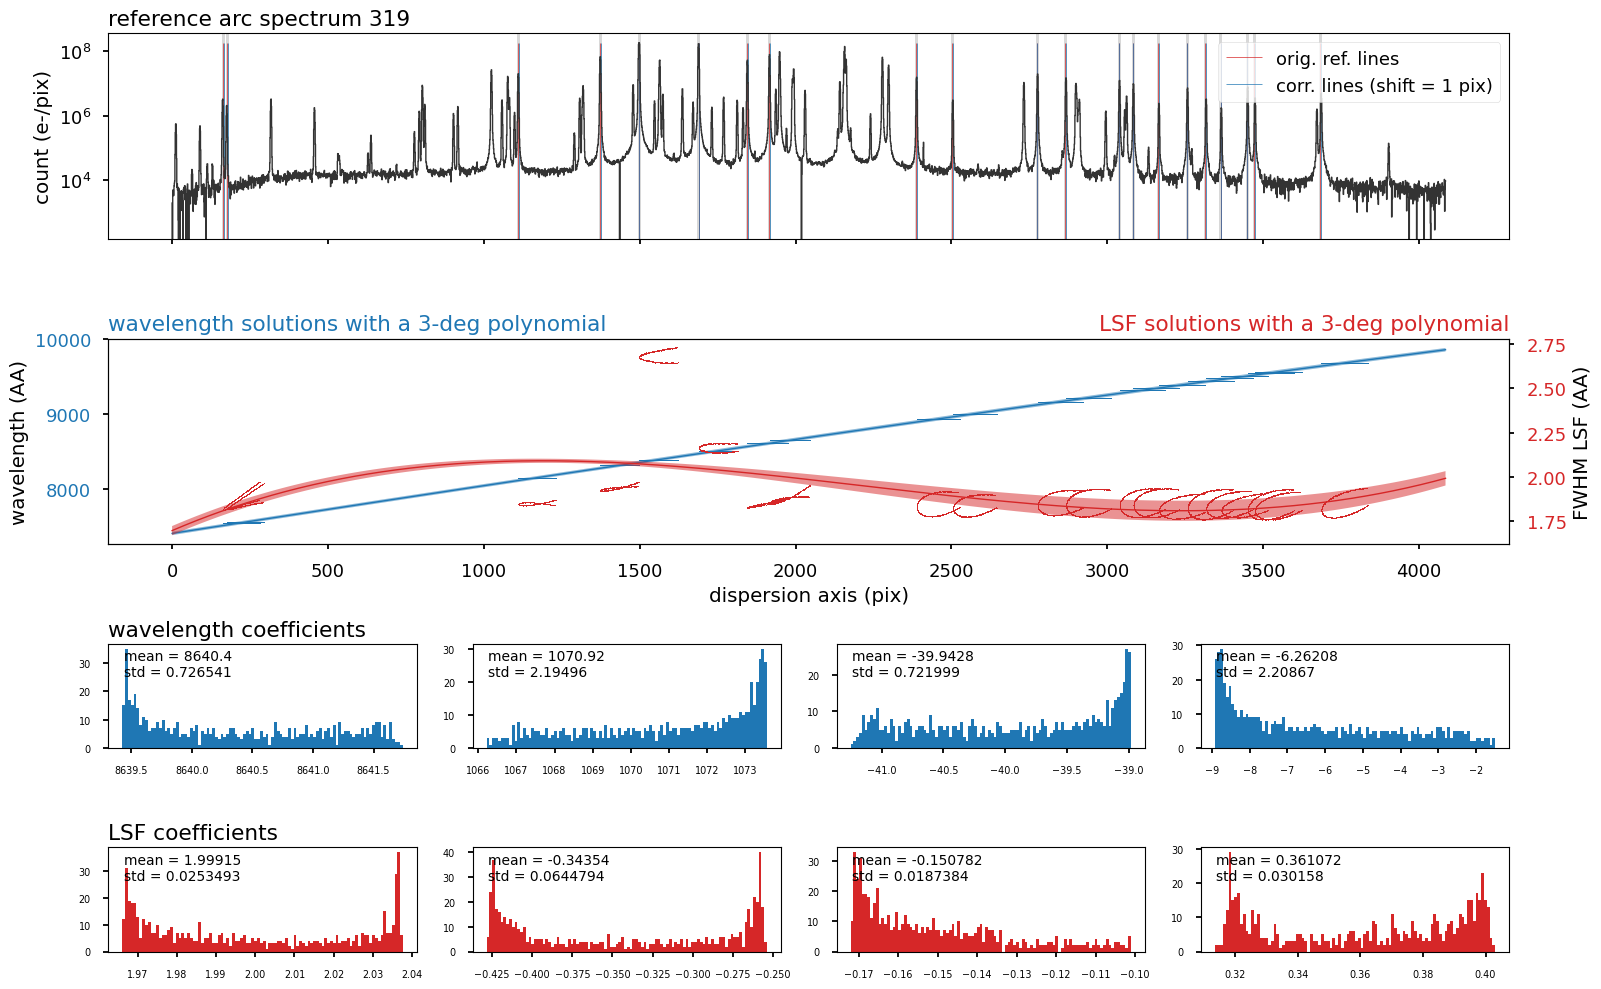

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z1-x.fits' and './data/lvm-super-lsf-z1-x.fits'
mjd                                  super
kind                                  xarc
camera                                  z2
exptime                                  x
path       ./data/lvm-super-xarc-z2-x.fits
Name: 325, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 26 percentage masked  19.2308 %
[INFO]: going to use 21 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z2-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = 9 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:06<00:00, 50.43fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:06<00:00, 52.13fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[INFO]: finished wavelength fitting with median RMS = 0.120137 AA (0.196202 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.0310348 AA (0.0520245 pix)


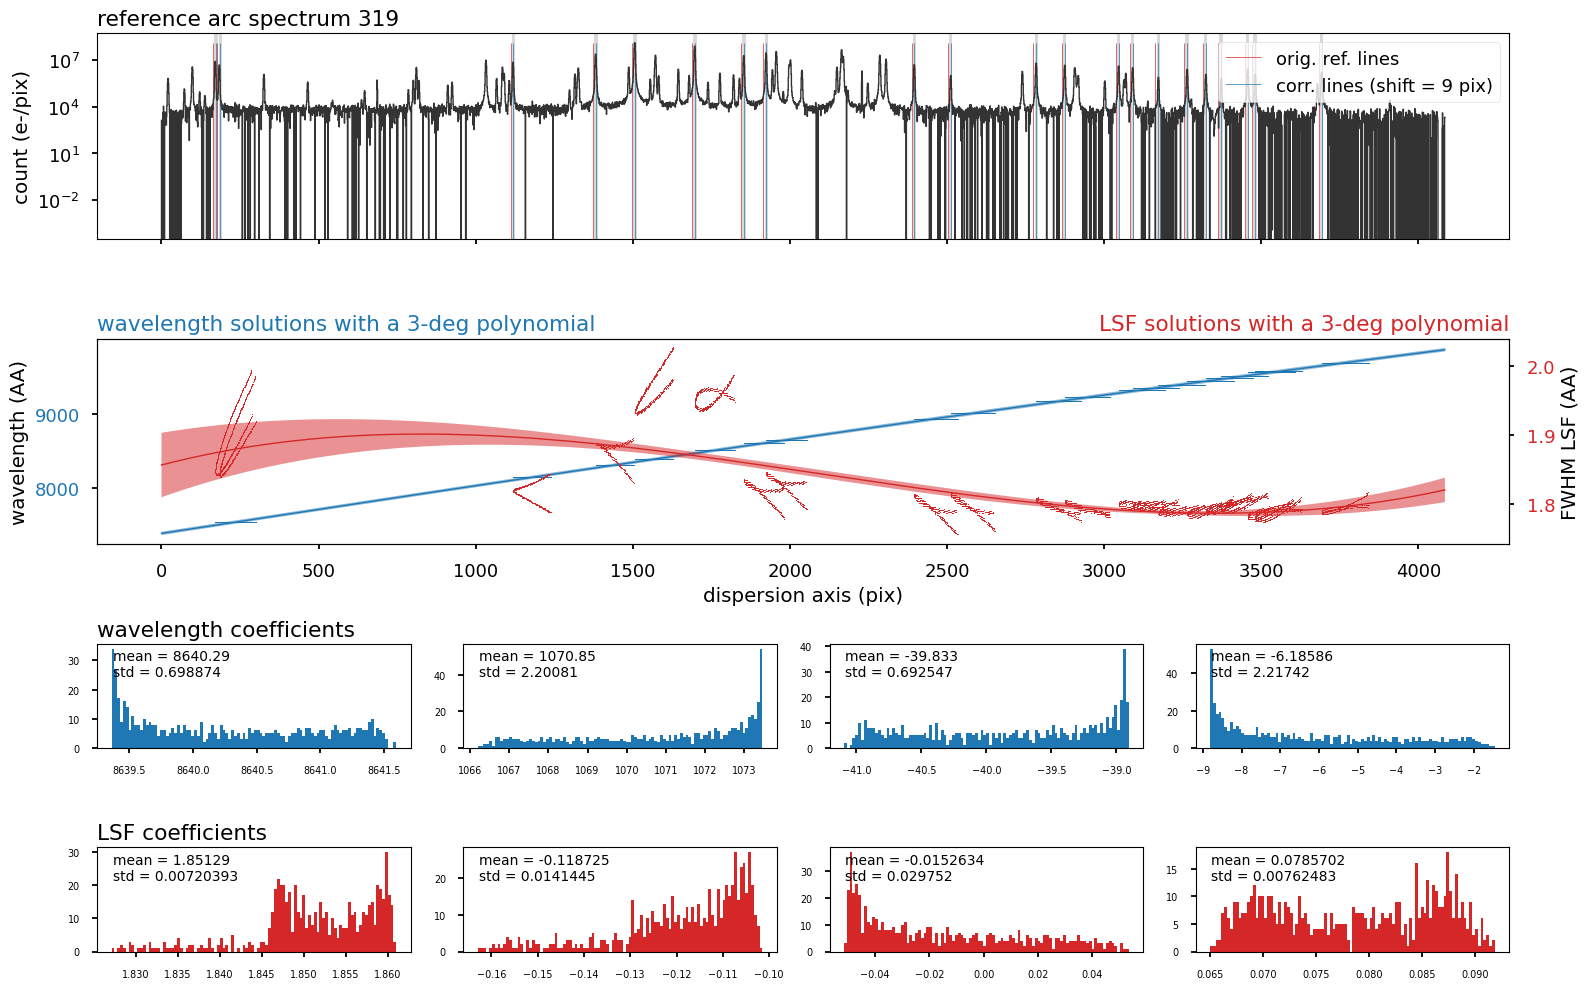

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z2-x.fits' and './data/lvm-super-lsf-z2-x.fits'
mjd                                  super
kind                                  xarc
camera                                  z3
exptime                                  x
path       ./data/lvm-super-xarc-z3-x.fits
Name: 391, dtype: object
[INFO]: reading guess lines from '../../python/lvmdrp/etc/lvm-neon_nist_z1.txt'
[INFO]: going to use fiber 319 as reference
[INFO]: number of guess lines in file 26 percentage masked  19.2308 %
[INFO]: going to use 21 guess lines
[INFO]: reading arc from './data/lvm-super-xarc-z3-x.fits'
[INFO]: calculating shift in guess lines using CC
[INFO]: maximum CC shift = -11 pix
[INFO]: measuring arc lines for each fiber from reference fiber 319, flux_min = 1.0, fwhm_max = 10.0 and relative flux limits [0.001, 100.0]


measuring arc lines upwards from ref_fiber = 319: 100%|##############################################| 319/319 [00:26<00:00, 11.94fiber/s]
measuring arc lines downwards from ref_fiber = 319: 100%|############################################| 318/318 [00:27<00:00, 11.57fiber/s]


[INFO]: smoothing FWHM of guess lines along cross-dispersion axis using 3-deg polynomials
[INFO]: fitting wavelength solutions using 3-deg polynomials
[WARNING]: fiber 636 has all lines masked
[WARNING]: fiber 637 has all lines masked
[INFO]: finished wavelength fitting with median RMS = 1.35099 AA (2.26226 pix)
[INFO]: fitting LSF solutions using 3-deg polynomials
[INFO]: finished LSF fitting with median RMS = 0.522244 AA (0.876315 pix)


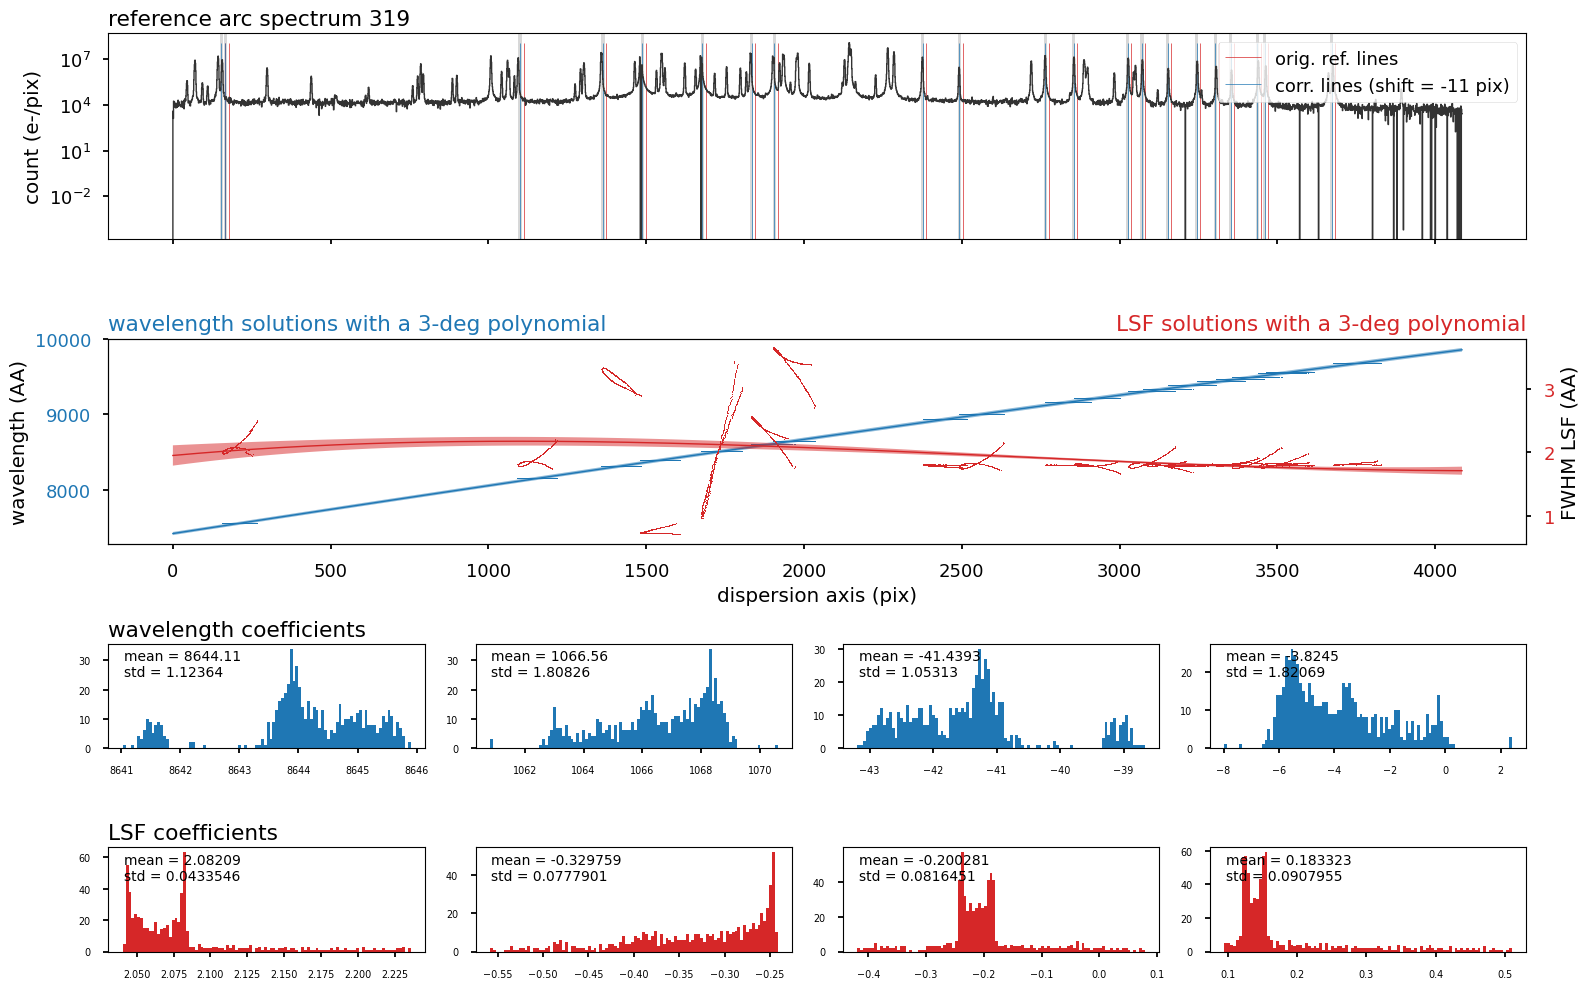

[INFO]: updating header and writing wavelength/LSF to './data/lvm-super-wave-z3-x.fits' and './data/lvm-super-lsf-z3-x.fits'


In [4]:
master_arcs = masters_table.query("mjd=='super' & kind=='xarc' & exptime=='x'").sort_values(["camera", "exptime"])
print(master_arcs.to_string())

CHANNEL_WL = {"b": (3600, 5930), "r": (5660, 7720), "z": (7470, 9800)}
lamps = "neon"
ised = 319

for _, marc in master_arcs.iterrows():
    print(marc)
            
    try:
        rssMethod.detWaveSolution_drp(
            in_arc=marc.path,
            out_wave=out_calib_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            out_lsf=out_calib_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            in_ref_lines=f"../../python/lvmdrp/etc/lvm-{lamps}_nist_{marc.camera[0]}1.txt",
            ref_fiber=ised, poly_disp=3, poly_fwhm=3, poly_cros=3, poly_kinds="poly,poly,poly",
            flux_min="1", fwhm_max="10", rel_flux_limits="0.001,100", aperture=12, plot=1
        )
        rssMethod.createPixTable_drp(
            in_rss=out_calib_path.format(mjd=marc.mjd, kind="xarc", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            out_rss=out_calib_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            arc_wave=out_calib_path.format(mjd=marc.mjd, kind="wave", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            arc_fwhm=out_calib_path.format(mjd=marc.mjd, kind="lsf", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits")
        )
        wave_range = CHANNEL_WL[marc.camera[0]]
        rssMethod.resampleWave_drp(
            in_rss=out_calib_path.format(mjd=marc.mjd, kind="warc", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            out_rss=out_calib_path.format(mjd=marc.mjd, kind="harc", camera=marc.camera, exptime=int(marc.exptime) if marc.exptime != "x" else marc.exptime, ext="fits"),
            start_wave=wave_range[0], end_wave=wave_range[1], disp_pix=1.0, method="linear",
            err_sim=10, parallel="auto", extrapolate=True
        )
    except Exception as e:
        rssMethod.rss_logger.error(e)